## Exercise 3 page 198 chapter 5

a) K-fold cross validation divides the dataset into K parts and leaves k-1 parts as the train set and 1 part as the test set. It is used to find the true accuracy of the model. It runs the model and determines its accuracy k times and then makes a summary of this result. The main goal is to reduce the cross validation result, which is the sum of all the mean square errors divided by the amount of folds (k)

b)

i)Validation set approach

 Advantages: Unexpensive, easy to implement 
 Disadvantages: Highly unbiased (specially if the dataset is too small)

ii) LOOCV 

Advantages: It always yields the same result and unbiased
Disadvantages: Expensive to implement and time consuming. 

## Exercise 8 page 200 chapter 5

In [3]:
#a)

set.seed(1)
x<-rnorm(100)
y<-x-2*x^2+rnorm(100)
#n= 100 observations and p=2 features

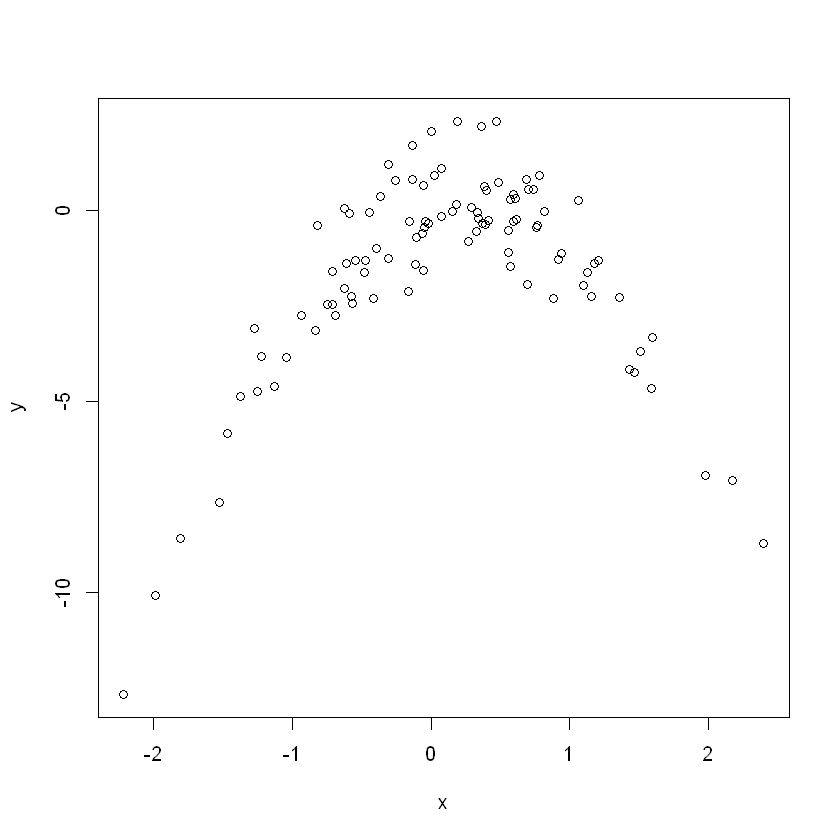

In [9]:
#b)
plot(x,y)
#As it can be observed the relationship is quadratic

In [18]:
#c)
library("ISLR")
library("boot")
set.seed(123)
dataframe <- data.frame(y, x, x2=x^2, x3=x^3, x4=x^4)

#first run
first_run <- glm(y~x,data=dataframe)
cv1 <- cv.glm(dataframe,first_run)
cv1$delta
#second run
second_run <- glm(y~x+x2,data=dataframe)
cv2 <- cv.glm(dataframe,second_run)
cv2$delta
#third run 
third_run <- glm(y~x+x2+x3,data=dataframe)
cv3 <- cv.glm(dataframe,third_run)
cv3$delta
#fourth run 
fourth_run <- glm(y~x+x2+x3+x4,data=dataframe)
cv4 <- cv.glm(dataframe,fourth_run)
cv4$delta


[1] 7.288162 7.284744

[1] 0.9374236 0.9371789

[1] 0.9566218 0.9562538

[1] 0.9539049 0.9534453

In [19]:
#d) 
set.seed(125)
dataframe <- data.frame(y, x, x2=x^2, x3=x^3, x4=x^4)

#first run
first_run <- glm(y~x,data=dataframe)
cv1 <- cv.glm(dataframe,first_run)
cv1$delta
#second run
second_run <- glm(y~x+x2,data=dataframe)
cv2 <- cv.glm(dataframe,second_run)
cv2$delta
#third run 
third_run <- glm(y~x+x2+x3,data=dataframe)
cv3 <- cv.glm(dataframe,third_run)
cv3$delta
#fourth run 
fourth_run <- glm(y~x+x2+x3+x4,data=dataframe)
cv4 <- cv.glm(dataframe,fourth_run)
cv4$delta

#The results are always the same because LOOCV always yields the same results so no randomness is involved

[1] 7.288162 7.284744

[1] 0.9374236 0.9371789

[1] 0.9566218 0.9562538

[1] 0.9539049 0.9534453

e) The smallest error where the second order polynomial and this is totally expectable because the original model was made using a quadratic formula. 

In [21]:
#f) 
total_fit <- lm(y~poly(x,4))
summary(total_fit)
#only x1 and x2 are statistically significant.


Call:
lm(formula = y ~ poly(x, 4))

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0550 -0.6212 -0.1567  0.5952  2.2267 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.55002    0.09591 -16.162  < 2e-16 ***
poly(x, 4)1   6.18883    0.95905   6.453 4.59e-09 ***
poly(x, 4)2 -23.94830    0.95905 -24.971  < 2e-16 ***
poly(x, 4)3   0.26411    0.95905   0.275    0.784    
poly(x, 4)4   1.25710    0.95905   1.311    0.193    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9591 on 95 degrees of freedom
Multiple R-squared:  0.8753,	Adjusted R-squared:  0.8701 
F-statistic: 166.7 on 4 and 95 DF,  p-value: < 2.2e-16


## Exercise 1 page 259 chapter 6 

a) Best subset will have the lowest RSS because it will look at all the combination of the models in order to decide which is best , while the other two models dont have the opportunity to look at all of the possible models, leaving some behind. 

b) This information is unknown as the behaviour in the test set might be different than in the train set for each of the models.

c)
i)TRUE
ii)TRUE
iii)FALSE 
iv)FALSE
v)FALSE

## Exercise 9 page 263 chapter 6 

In [28]:
#a) Split data 
data(College)
## 75% of the sample size
smp_size <- floor(0.75 * nrow(College))

## set the seed to make your partition reproducible
set.seed(1297)
train_ind <- sample(seq_len(nrow(College)), size = smp_size)

train <- College[train_ind, ]
test <- College[-train_ind, ]
head(College)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


In [30]:
#b)
trainmodel <- lm(Apps~., data=train)
prediction <- predict(trainmodel, test)
(error<- mean((test$Apps - prediction)^2))

error

[1] 909064.5

[1] 909064.5

In [33]:
#c) 
library(glmnet)
trainridge <- model.matrix(Apps~., data=train)[,-1]
testridge <- model.matrix(Apps~., data=test)[,-1]
ridgefit <- cv.glmnet(trainridge, train$Apps, alpha=0)
(lambda <- ridgefit$lambda.min)
ridge_prediction <- predict(ridgefit, s=lambda, newx=testridge)
(ridge_error <- mean((test$Apps - ridge_prediction)^2)) 

[1] 413.2507

[1] 1090614

In [34]:
#d)
trainlasso <- model.matrix(Apps~., data=train)[,-1]
testlasso <- model.matrix(Apps~., data=test)[,-1]
lassofit <- cv.glmnet(trainlasso, train$Apps, alpha=1)
(lambda <- lassofit$lambda.min)  
prediction_lasso <- predict(lassofit, s=lambda, newx=testlasso)
(lasso_error <- mean((test$Apps - prediction_lasso)^2))  
lasso_coefficient <- predict(lassofit, type="coefficients", s=lambda)[1:ncol(College),]
lasso_coefficient[lasso_coefficient != 0]
length(lasso_coefficient[lasso_coefficient != 0])

[1] 24.77373

[1] 919815.4

(Intercept)    PrivateYes        Accept        Enroll     Top10perc 
-586.08093369 -406.82988387    1.44956902   -0.17887321   33.18189306 
  P.Undergrad      Outstate    Room.Board      Personal           PhD 
   0.01505861   -0.04873154    0.10978939    0.09041790   -6.83107113 
     Terminal     S.F.Ratio   perc.alumni        Expend     Grad.Rate 
  -5.25794391    0.18715669   -0.50879392    0.06776725    5.35035223

[1] 15

In [39]:
#e)
install.packages(pls)
library(pls)
set.seed(154)
pcrfit <- pcr(Apps~., data=train, scale=TRUE, validation="CV")
validationplot(pcrfit, val.type="MSEP")
summary(pcrfit)
pcr_prediction <- predict(pcrfit, test, ncomp=16)  
(pcr_error <- mean((test$Apps - pcr_prediction)^2)) 

ERROR: Error in install.packages(plsR): object 'plsR' not found


In [36]:
#f)
set.seed(178)
plsfit <- plsr(Apps~., data=train, scale=TRUE, validation="CV")
validationplot(plsfit, val.type="MSEP")
summary(plsfit)
pls_prediction <- predict(plsfit, test, ncomp=10)  
(pls_error <- mean((test$Apps - pls_prediction)^2))

ERROR: Error in plsr(Apps ~ ., data = train, scale = TRUE, validation = "CV"): could not find function "plsr"


g) 

## Exercise 9 page 299 chapter 7

In [ ]:
#a)

In [ ]:
#b)

In [ ]:
#c)

In [ ]:
#d)

In [ ]:
#e)

In [ ]:
#f)

## Exercise 10 page 300 chapter 7

In [ ]:
#a)

In [ ]:
#b)

In [ ]:
#c)

In [ ]:
#d)